# Projet 5 : Optimisez la gestion des données d'une boutique avec Python 

Importation des librairies

In [2]:
import pandas as pd
import numpy as np

Importation des 3 fichiers 

In [3]:
base_erp = pd.read_excel('/Users/Anais/Desktop/OCR/P5/erp.xlsx')
base_web = pd.read_excel('/Users/Anais/Desktop/OCR/P5/web.xlsx')
liaison_web_erp = pd.read_excel('/Users/Anais/Desktop/OCR/P5/liaison.xlsx')

/Users/Anais/opt/anaconda3/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:312: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


# Vérification du DF base_erp 

In [5]:
print(base_erp.shape)
base_erp.info()
base_erp.head()


(825, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   product_id      825 non-null    int64  
 1   onsale_web      825 non-null    int64  
 2   price           825 non-null    float64
 3   stock_quantity  825 non-null    int64  
 4   stock_status    825 non-null    object 
dtypes: float64(1), int64(3), object(1)
memory usage: 32.4+ KB


,product_id,onsale_web,price,stock_quantity,stock_status
0,3847,1,24.2,0,outofstock
1,3849,1,34.3,0,outofstock
2,3850,1,20.8,0,outofstock
3,4032,1,14.1,0,outofstock
4,4039,1,46.0,0,outofstock


Vérification que la colonne product_id est une clé unique. Nous allons créer une fonction qui va nous permettre de vérifier cela.

In [8]:
def CleUnique (df, colonne):
    if df.size == df.drop_duplicates(colonne).size :
        print ("La clé est unique dans le DF")
        print("Elle peut être utilisée comme clé primaire".format(colonne))
    else : 
        print("La clé nest pas unique dans le DF")
        print("Elle ne peut pas être utilisée comme clé primaire".format(colonne))

In [9]:
CleUnique(base_erp, 'product_id')

La clé est unique dans le DF
Elle peut être utilisée comme clé primaire


La clé product_id est bien unique dans le DF, nous pouvons donc l'utiliser comme clé primaire par la suite

# Vérification du DF base_web

In [10]:
print(base_web.shape)
base_web.info()
base_web.head()

(1513, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1513 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1513 non-null   int64         
 2   downloadable           1513 non-null   int64         
 3   rating_count           1513 non-null   int64         
 4   average_rating         1430 non-null   float64       
 5   total_sales            1430 non-null   float64       
 6   tax_status             716 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1430 non-null   float64       
 9   post_date              1430 non-null   datetime64[ns]
 10  post_date_gmt          1430 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1430 non-null   object      

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


On voit qu'il y a 1513 lignes dans le DF base_web mais qu'il y a seulement 1428 valeurs non nulles ce qui signifie qu'il existe des valeurs nulles pour cette colonne, nous allons donc les rechercher. 

In [11]:
recherche_null = base_web[base_web['sku'].isnull()]

On observe le DF recherche_null à présent 

In [12]:
print(recherche_null.shape)
recherche_null.info()
recherche_null.head()

(85, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 178 to 796
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    0 non-null      object        
 1   virtual                85 non-null     int64         
 2   downloadable           85 non-null     int64         
 3   rating_count           85 non-null     int64         
 4   average_rating         2 non-null      float64       
 5   total_sales            2 non-null      float64       
 6   tax_status             2 non-null      object        
 7   tax_class              0 non-null      float64       
 8   post_author            2 non-null      float64       
 9   post_date              2 non-null      datetime64[ns]
 10  post_date_gmt          2 non-null      datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             2 non-null      object        


,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
178,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
179,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
227,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
230,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
231,NaN,0,0,0,NaN,NaN,NaN,NaN,NaN,NaT,...,NaN,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Il y a donc 85 valeurs nulles dans la colonne sku. Nous pouvons donc supprimer ces lignes puis tester l'unicité de la colonne sku.

In [14]:
base_web_drop_null = base_web[base_web['sku'].notnull()]

Vérifions maintenant le DF base_web_drop_null qui ne doit plus contenir les null

In [15]:
print(base_web_drop_null.shape)
base_web_drop_null.info()
base_web_drop_null.head()

(1428, 28)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1428 entries, 0 to 1512
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   sku                    1428 non-null   object        
 1   virtual                1428 non-null   int64         
 2   downloadable           1428 non-null   int64         
 3   rating_count           1428 non-null   int64         
 4   average_rating         1428 non-null   float64       
 5   total_sales            1428 non-null   float64       
 6   tax_status             714 non-null    object        
 7   tax_class              0 non-null      float64       
 8   post_author            1428 non-null   float64       
 9   post_date              1428 non-null   datetime64[ns]
 10  post_date_gmt          1428 non-null   datetime64[ns]
 11  post_content           0 non-null      float64       
 12  post_title             1428 non-null   object      

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Notre nouveau DF ne contient plus que 1428 lignes, les 85 lignes nulles ont donc bien été supprimées. Nous allons à présent tester l'unicité de notre clé. 

In [16]:
CleUnique(base_web_drop_null, 'sku')

La clé nest pas unique dans le DF
Elle ne peut pas être utilisée comme clé primaire


Notre clé sku n'est toujours pas unique, essayons de comprendre pourquoi en observant uniquement quelques lignes du DF

In [18]:
base_web_drop_null

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1508,16135,0,0,0,0.0,5.0,NaN,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1509,15891,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1510,15887,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0
1511,13127-1,0,0,0,0.0,0.0,NaN,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/wp-content/uploads/...,0.0,attachment,image/jpeg,0.0


Nous pouvons voir dans le DF base_erp_web qu'il y a la présence de doublons. Ces derniers s'expliquent car dans la colonne post_type chaque clé 'sku' dispose de 2 types à savoir "product" et "attachment". Pour la suite de nos calculs, ce sont uniquement les produits qui nous intéressent donc nous allons filter sur "product" dans la colonne en question.

In [20]:
ma_produits = base_web_drop_null['post_type']== 'product'
base_web_produits = base_web_drop_null[ma_produits]
base_web_produits

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,post_name,post_modified,post_modified_gmt,post_content_filtered,post_parent,guid,menu_order,post_type,post_mime_type,comment_count
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,bon-cadeau-de-25-euros,2018-06-01 14:13:57,2018-06-01 12:13:57,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,pierre-jean-villa-saint-joseph-preface-2018,2019-12-30 09:30:29,2019-12-30 08:30:29,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,pierre-jean-villa-saint-joseph-tilde-2017,2019-12-21 09:00:17,2019-12-21 08:00:17,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,pierre-jean-villa-croze-hermitage-accroche-coe...,2020-06-26 18:15:03,2020-06-26 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,pierre-jean-villa-igp-gamine-2018,2020-01-04 16:36:01,2020-01-04 15:36:01,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
762,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,mouthes-le-bihan-aime-chai-2015,2020-08-26 17:35:03,2020-08-26 15:35:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
767,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,camin-larredya-jurancon-sec-la-virada-2018,2020-08-26 17:35:02,2020-08-26 15:35:02,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
768,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,jamet-cote-rotie-fructus-voluptas-2018,2020-08-14 18:15:03,2020-08-14 16:15:03,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0
797,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,clos-du-mont-olivet-chateauneuf-du-pape-2007-2,2020-07-20 17:09:06,2020-07-20 15:09:06,NaN,0.0,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0


Suite à la suppression des doublons, il ne reste plus que 714 lignes. Vérifions que le fait de filtrer sur la colonne 'post_type' élimine bien les doublons en retestant l'unicité de la clé sku. 

In [22]:
CleUnique(base_web_produits, 'sku')

La clé est unique dans le DF
Elle peut être utilisée comme clé primaire


# Vérification du DF liaison_web_erp

In [25]:
print(liaison_web_erp.shape)
liaison_web_erp.info()
liaison_web_erp.head()

(825, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 825 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  825 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 13.0+ KB


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


Suite à une première observation, nous remarquons déjà que la colonne 'product_id' ne contient pas de valeurs nulles tandis que la colonne 'sku' en contient. Nous allons regarder les valeurs nulles détectées dans la colonne 'id_web'.

In [28]:
recherche_null_2 = liaison_web_erp[liaison_web_erp['id_web'].isnull()]
print(recherche_null_2.shape)
recherche_null_2.info()
recherche_null_2.head()

(91, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 91 entries, 19 to 821
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  91 non-null     int64 
 1   id_web      0 non-null      object
dtypes: int64(1), object(1)
memory usage: 2.1+ KB


,product_id,id_web
19,4055,NaN
49,4090,NaN
50,4092,NaN
119,4195,NaN
131,4209,NaN


Il y a donc 91 valeurs nulles dans la colonne 'id_web', nous allons pouvoir les supprimer. 

In [29]:
liaison_web_erp_drop_null = liaison_web_erp[liaison_web_erp['id_web'].notnull()]
print(liaison_web_erp_drop_null.shape)
liaison_web_erp_drop_null.info()
liaison_web_erp_drop_null.head()

(734, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 734 entries, 0 to 824
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  734 non-null    int64 
 1   id_web      734 non-null    object
dtypes: int64(1), object(1)
memory usage: 17.2+ KB


,product_id,id_web
0,3847,15298
1,3849,15296
2,3850,15300
3,4032,19814
4,4039,19815


Ensuite, nous vérifions que la colonne 'product_id' est bien une clé unique.

In [31]:
CleUnique(liaison_web_erp_drop_null, 'product_id')

La clé est unique dans le DF
Elle peut être utilisée comme clé primaire


Dans un second temps, nous vérifions que la colonne 'web_id' est bien une clé unique.

In [34]:
CleUnique(liaison_web_erp_drop_null,'id_web')

La clé est unique dans le DF
Elle peut être utilisée comme clé primaire


Maintenant tous nos DF contiennent les clés uniques, nous allons pouvoir faire nos jointures. 

# Rapprochement des 2 exports 

On jointe le DF base_erp avec le DF liaison_web_erp_drop_null afin de récupérer l'id_web

In [36]:
merge_erp_web = pd.merge(base_erp,liaison_web_erp_drop_null, how='inner', on=['product_id', 'product_id'])
merge_erp_web

,product_id,onsale_web,price,stock_quantity,stock_status,id_web
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


On renomme la colonne id_web en sku car cette colonne va nous permettre de faire la jointure entre le DF merge_erp_web et le DF base_web

In [37]:
merge_erp_web = merge_erp_web.rename(columns={"id_web" : "sku"})
merge_erp_web

,product_id,onsale_web,price,stock_quantity,stock_status,sku
0,3847,1,24.2,0,outofstock,15298
1,3849,1,34.3,0,outofstock,15296
2,3850,1,20.8,0,outofstock,15300
3,4032,1,14.1,0,outofstock,19814
4,4039,1,46.0,0,outofstock,19815
...,...,...,...,...,...,...
729,7023,1,27.5,15,instock,15891
730,7025,1,69.0,2,instock,15887
731,7247,1,54.8,23,instock,13127-1
732,7329,0,26.5,14,instock,14680-1


On va faire une jointure entre le DF base_web_produits et le DF merge_erp_web sur la clé sku

In [38]:
base_web_erp = pd.merge(base_web_produits,merge_erp_web, how='inner', on=['sku', 'sku'])
base_web_erp

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
0,bon-cadeau-25-euros,0,0,0,0.0,10.0,taxable,NaN,1.0,2018-06-01 13:53:46,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4954,1,25.0,0,instock
1,15298,0,0,0,0.0,6.0,taxable,NaN,2.0,2018-02-08 12:58:52,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3847,1,24.2,0,outofstock
2,15296,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 13:49:41,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3849,1,34.3,0,outofstock
3,15300,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-08 14:08:36,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,3850,1,20.8,0,outofstock
4,19814,0,0,0,0.0,3.0,taxable,NaN,2.0,2018-02-09 14:01:05,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4032,1,14.1,0,outofstock
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
709,16135,0,0,0,0.0,5.0,taxable,NaN,2.0,2020-04-25 13:22:38,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,6930,1,8.4,83,instock
710,15891,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 14:53:40,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7023,1,27.5,15,instock
711,15887,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-05-02 15:00:54,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7025,1,69.0,2,instock
712,13127-1,0,0,0,0.0,0.0,taxable,NaN,2.0,2020-06-09 15:42:04,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,7247,1,54.8,23,instock


# Calcul du chiffre d'affaires par produit

On filtre sur les colonnes qui nous intéressent pour calculer le chiffre d'affaires par produit 

In [39]:
df_produits_filter = base_web_erp.filter(['product_id', 'sku','total_sales', 'price'])
df_produits_filter

,product_id,sku,total_sales,price
0,4954,bon-cadeau-25-euros,10.0,25.0
1,3847,15298,6.0,24.2
2,3849,15296,0.0,34.3
3,3850,15300,0.0,20.8
4,4032,19814,3.0,14.1
...,...,...,...,...
709,6930,16135,5.0,8.4
710,7023,15891,0.0,27.5
711,7025,15887,0.0,69.0
712,7247,13127-1,0.0,54.8


On calcule ensuite le chiffre d'affaire par produit en multipliant la colonne 'total_sales' par la colonne 'price' et l'on vient mettre le résultat de ce calcul dans une nouvelle colonne 'Chiffre affaires par produit'

In [40]:
chiffre_affaires_pdts = df_produits_filter['total_sales'] * df_produits_filter['price']
df_produits_filter['Chiffre affaires par produit'] = chiffre_affaires_pdts
df_produits_filter

,product_id,sku,total_sales,price,Chiffre affaires par produit
0,4954,bon-cadeau-25-euros,10.0,25.0,250.0
1,3847,15298,6.0,24.2,145.2
2,3849,15296,0.0,34.3,0.0
3,3850,15300,0.0,20.8,0.0
4,4032,19814,3.0,14.1,42.3
...,...,...,...,...,...
709,6930,16135,5.0,8.4,42.0
710,7023,15891,0.0,27.5,0.0
711,7025,15887,0.0,69.0,0.0
712,7247,13127-1,0.0,54.8,0.0


# Total du chiffre d’affaires réalisé en ligne

Pour calculer le chiffre d'affaires total, il suffit de faire la somme de toutes les valeurs contenues dans la colonne 'Chiffre affaires par produit'

In [41]:
df_produits_filter['Chiffre affaires par produit'].sum()

70568.6

# Analyse sur le prix des produits afin de détecter d’éventuelles valeurs aberrantes : les lister et faire une représentation graphique

In [44]:
base_web_erp.describe()

,virtual,downloadable,rating_count,average_rating,total_sales,tax_class,post_author,post_content,post_password,post_content_filtered,post_parent,menu_order,comment_count,product_id,onsale_web,price,stock_quantity
count,714.0,714.0,714.0,714.0,714.000000,0.0,714.000000,0.0,0.0,0.0,714.0,714.0,714.0,714.000000,714.0,714.000000,714.000000
mean,0.0,0.0,0.0,0.0,4.012605,NaN,1.998599,NaN,NaN,NaN,0.0,0.0,0.0,5032.557423,1.0,32.493137,28.746499
std,0.0,0.0,0.0,0.0,8.518183,NaN,0.037424,NaN,NaN,NaN,0.0,0.0,0.0,790.510878,0.0,27.810525,48.012608
min,0.0,0.0,0.0,0.0,0.000000,NaN,1.000000,NaN,NaN,NaN,0.0,0.0,0.0,3847.000000,1.0,5.200000,0.000000
25%,0.0,0.0,0.0,0.0,0.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4280.250000,1.0,14.100000,2.000000
50%,0.0,0.0,0.0,0.0,1.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,4796.000000,1.0,23.550000,12.000000
75%,0.0,0.0,0.0,0.0,4.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,5710.500000,1.0,42.175000,35.000000
max,0.0,0.0,0.0,0.0,96.000000,NaN,2.000000,NaN,NaN,NaN,0.0,0.0,0.0,7338.000000,1.0,225.000000,578.000000


Nous représentons la dispersion des prix dans un histogramme. Nous pouvons déjà faire un premier constat en remarquant que la majorité des prix se situent en dessous de 100 euros.

<AxesSubplot:>

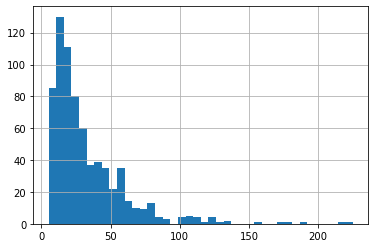

In [46]:
base_web_erp['price'].hist(bins=40)

Nous utilisons la fonction boxplot de la librairie seaborn afin de mettre en évidence la distribution des données au travers d'une boite à moustache. Nous remarquons bien les outliers autrement dit les valeurs aberrantes qui sont bien représentées avec ce visuel.

<AxesSubplot:>

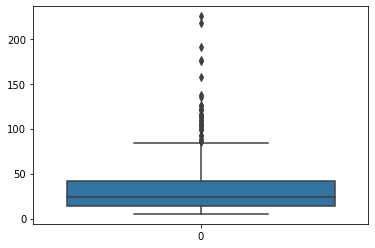

In [47]:
import seaborn
seaborn.boxplot(data=base_web_erp['price'])

Détection des valeurs aberrantes avec la méthode inter quartiles

Dans un premier temps on trie les prix dans un ordre croissant avec la fonction sorted()

In [52]:
prix = base_web_erp['price']
prix = sorted(prix)
prix

[5.2,
 5.7,
 5.7,
 5.7,
 5.7,
 5.8,
 5.8,
 5.8,
 5.8,
 6.3,
 6.5,
 6.5,
 6.5,
 6.7,
 6.8,
 6.8,
 7.0,
 7.0,
 7.1,
 7.1,
 7.1,
 7.2,
 7.4,
 7.4,
 7.5,
 7.6,
 7.6,
 7.7,
 7.8,
 7.8,
 7.9,
 7.9,
 8.1,
 8.2,
 8.4,
 8.5,
 8.5,
 8.6,
 8.6,
 8.7,
 8.7,
 8.7,
 8.7,
 8.7,
 8.9,
 8.9,
 8.9,
 9.0,
 9.0,
 9.1,
 9.1,
 9.2,
 9.3,
 9.3,
 9.3,
 9.3,
 9.3,
 9.3,
 9.4,
 9.5,
 9.5,
 9.6,
 9.6,
 9.7,
 9.7,
 9.7,
 9.8,
 9.8,
 9.8,
 9.9,
 9.9,
 9.9,
 9.9,
 9.9,
 9.9,
 10.1,
 10.1,
 10.2,
 10.2,
 10.3,
 10.3,
 10.4,
 10.4,
 10.6,
 10.6,
 10.7,
 10.7,
 10.7,
 10.7,
 10.8,
 10.8,
 10.8,
 10.9,
 10.9,
 11.0,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.1,
 11.3,
 11.3,
 11.5,
 11.5,
 11.6,
 11.6,
 11.6,
 11.8,
 11.9,
 11.9,
 11.9,
 11.9,
 11.9,
 12.0,
 12.0,
 12.0,
 12.0,
 12.0,
 12.1,
 12.1,
 12.1,
 12.2,
 12.3,
 12.3,
 12.5,
 12.5,
 12.5,
 12.6,
 12.6,
 12.6,
 12.6,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.7,
 12.8,
 12.8,
 12.8,
 12.8,
 12.8,
 12.8,
 12.9,
 12.9,
 12.9,
 12.9,
 12.9,
 13.0,
 13.1,
 13.1,
 13.

On calcule ensuite l'écart interquartile

In [53]:
q1 , q3 = np.percentile(prix,[25,75])
ecart_interquartile = q3 - q1 

Puis on calcule les valeurs considérées comme aberrantes

In [55]:
borne_inferieure = q1 - (ecart_interquartile * 1.5)
borne_superieure = q3 + (ecart_interquartile * 1.5)

Enfin, nous mettons en évidence les outliers. Avec la méthode inter quartile, nous détections 32 valeurs aberrantes. 

In [57]:
outliers = base_web_erp[(base_web_erp['price']> borne_superieure) | (base_web_erp['price']< borne_inferieure)]
outliers

,sku,virtual,downloadable,rating_count,average_rating,total_sales,tax_status,tax_class,post_author,post_date,...,guid,menu_order,post_type,post_mime_type,comment_count,product_id,onsale_web,price,stock_quantity,stock_status
64,15382,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:08:45,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4115,1,100.0,11,instock
66,11668,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-02-13 11:43:55,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4132,1,88.4,5,instock
200,15940,0,0,0,0.0,5.0,taxable,NaN,2.0,2018-03-02 10:30:04,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4352,1,225.0,0,outofstock
202,12589,0,0,0,0.0,11.0,taxable,NaN,2.0,2018-03-02 10:46:10,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4355,1,126.5,2,instock
206,13853,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-03-02 11:11:48,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4359,1,85.6,0,outofstock
219,3510,0,0,0,0.0,13.0,taxable,NaN,2.0,2018-03-22 11:21:05,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4402,1,176.0,8,instock
220,3507,0,0,0,0.0,2.0,taxable,NaN,2.0,2018-03-22 11:32:55,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4404,1,108.5,2,instock
222,7819,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-03-22 11:42:48,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4406,1,157.0,3,instock
223,3509,0,0,0,0.0,1.0,taxable,NaN,2.0,2018-03-22 11:49:53,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4407,1,104.0,6,instock
228,12857,0,0,0,0.0,0.0,taxable,NaN,2.0,2018-04-12 17:56:13,...,https://www.bottle-neck.fr/?post_type=product&...,0.0,product,NaN,0.0,4582,1,109.6,7,instock
